In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.pyplot as plt 
import time

In [ ]:
#Feature extraction is to transform image into list of features using grid technique 
def feature_extraction(x_path,y_path):
    x_array=[] # 2d list to store features of images
    y_array=[] # list to store y labels
    trainlabel_file=open(y_path,"r")

    for line in trainlabel_file:
        y_array.append(int(line.rstrip()))
    xfile=open(x_path,"r")
    num_lines=0
    xfile_list=[]
    for line in xfile:
      num_lines=num_lines+1
      xfile_list.append(line)
    
    for i in range(0,num_lines,70):
        xi_feature=[]
        row_count=i 
        for j in range(7): # taking 10x10 grids of image 
            ind_col_count=0
            white_count=0
            col=0
            while(col<6):
                white_count=0
                old_colcount=ind_col_count
                for k in range(row_count,row_count+10):
                    ind_col_count=old_colcount
                    for l in range (old_colcount,old_colcount+10):
                        if(xfile_list[k][l]==' '):
                            ind_col_count=ind_col_count+1
                            white_count=white_count+1
                        else:
                            ind_col_count=ind_col_count+1
                xi_feature.append(round((white_count/100)*10))
                col=col+1
            row_count=row_count+10
        x_array.append(xi_feature)
    return x_array,y_array
                    

In [ ]:
X_features,Y_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatrain","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatrainlabels")


In [ ]:
print(len(X_features))
print(len(Y_labels))

451
451


In [ ]:
Xvalidation_features,Yvalidation_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatavalidation","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatavalidationlabels")


In [ ]:
print(len(Xvalidation_features))
print(len(Yvalidation_labels))

301
301


In [ ]:
Xtest_features,Ytest_labels=feature_extraction("/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatest","/Users/rohithgummadi/Desktop/AI_Project/facedata/facedatatestlabels")


In [ ]:
print(len(Xtest_features))
print(len(Ytest_labels))

150
150


In [ ]:
#Predicting validation data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_features, Y_labels)
test_completion_labels=knn.predict(Xvalidation_features)
print(test_completion_labels)
print(len(test_completion_labels))

[1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 1]
301


In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Yvalidation_labels[i]):
    acc_count+=1
print("Accuracy count",acc_count)
print("Accuracy for validation data",(acc_count/len(test_completion_labels))*100)

Accuracy count 219
Accuracy for validation data 72.75747508305648


In [ ]:
#Predicting testing data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_features, Y_labels)
test_completion_labels=knn.predict(Xtest_features)
print(test_completion_labels)
print(len(test_completion_labels))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 1]
150


In [ ]:
acc_count=0
for i in range(len(test_completion_labels)):
  if(test_completion_labels[i]==Ytest_labels[i]):
    acc_count+=1
print("Accuracy count",acc_count)
print("Accuracy for test data",(acc_count/len(test_completion_labels))*100)

Accuracy count 108
Accuracy for test data 72.0


In [ ]:
#Training samples function to calculate accuracy for different sample sizes 
def training_samples():
  percent_train=[10,20,30,40,50,60,70,80,90,100] # To train on different samples of data
  accuracy_list=[]
  for ind in percent_train:
    data_points=int((ind/100)*len(X_features))
    indices_list=random.sample(range(0,len(X_features)),data_points)
    Xtrain_features=[]
    Ytrain_labels=[]
    for index in indices_list:
      Xtrain_features.append(X_features[index])
      Ytrain_labels.append(Y_labels[index])
    
    test_completion_output=[]
    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(Xtrain_features, Ytrain_labels)  # Fitting knn classifier with train data
    test_completion_output=knn.predict(Xtest_features)
    acc_count=0
    for i in range(len(test_completion_output)):
      if(test_completion_output[i]==Ytest_labels[i]):
        acc_count+=1
    accuracy=(acc_count/len(test_completion_output))*100
    print("Accuracy for",ind,"% data is",accuracy)
    accuracy_list.append(accuracy)

In [ ]:
training_samples()

Accuracy for 10 % data is 64.66666666666666
Accuracy for 20 % data is 66.66666666666666
Accuracy for 30 % data is 65.33333333333333
Accuracy for 40 % data is 65.33333333333333
Accuracy for 50 % data is 75.33333333333333
Accuracy for 60 % data is 71.33333333333334
Accuracy for 70 % data is 69.33333333333334
Accuracy for 80 % data is 73.33333333333333
Accuracy for 90 % data is 68.0
Accuracy for 100 % data is 72.66666666666667


In [ ]:
#cal_m_std function is to calculate mean and standard deviation of different sample sizes accuracies
percent_train=[10,20,30,40,50,60,70,80,90,100]
mean_list=[]
std_list=[]
time_list=[]
def cal_m_std():
  for ind in percent_train:
    accuracy_list=[]
    percent_timelist=[]
    for i in range(5):
      data_points=int((ind/100)*len(X_features))
      indices_list=random.sample(range(0,len(X_features)),data_points)
      Xtrain_features=[]
      Ytrain_labels=[]
      for index in indices_list:
        Xtrain_features.append(X_features[index])
        Ytrain_labels.append(Y_labels[index])
      
      test_completion_output=[]
      knn = KNeighborsClassifier(n_neighbors=5)
      start=time.time() # Start time
      knn.fit(Xtrain_features, Ytrain_labels)
      test_completion_output=knn.predict(Xtest_features)
      end=time.time() # End time
      percent_timelist.append((end-start)*10**3)
      acc_count=0
      for i in range(len(test_completion_output)):
        if(test_completion_output[i]==Ytest_labels[i]):
          acc_count+=1
      accuracy=(acc_count/len(Xtest_features))*100
      accuracy_list.append(accuracy)
    time_list.append(np.average(percent_timelist))
    mean_list.append(np.average(accuracy_list))
    std_list.append(np.std(accuracy_list))
    print("Time taken for",ind,"% data is", percent_timelist)
    print("mean time for",ind,"% data is ",np.average(percent_timelist))
    print("accuracy_list for",ind,"% data is", accuracy_list) 
    print("mean accuracies for",ind,"% data is ",np.average(accuracy_list))# Mean of accuracies of sample data
    print("standard deviation of accuracies for",ind,"% data is",np.std(accuracy_list)) #Standard deviation of accuracies of sample data
    print("\n")

In [ ]:
cal_m_std()

Time taken for 10 % data is [20.212888717651367, 17.122745513916016, 24.9178409576416, 26.60512924194336, 19.53268051147461]
mean time for 10 % data is  21.67825698852539
accuracy_list for 10 % data is [68.66666666666667, 66.0, 54.666666666666664, 60.66666666666667, 70.66666666666667]
mean accuracies for 10 % data is  64.13333333333334
standard deviation of accuracies for 10 % data is 5.802681372530387


Time taken for 20 % data is [40.013790130615234, 20.699024200439453, 18.30887794494629, 22.2930908203125, 21.846771240234375]
mean time for 20 % data is  24.63231086730957
accuracy_list for 20 % data is [75.33333333333333, 76.0, 73.33333333333333, 67.33333333333333, 62.66666666666667]
mean accuracies for 20 % data is  70.93333333333332
standard deviation of accuracies for 20 % data is 5.139822737972366


Time taken for 30 % data is [32.57250785827637, 30.101776123046875, 30.0137996673584, 23.354530334472656, 23.565053939819336]
mean time for 30 % data is  27.921533584594727
accuracy_li

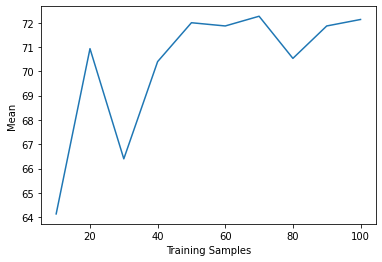

In [ ]:
plt.plot(percent_train,mean_list)
plt.xlabel("Training Samples")
plt.ylabel("Mean")
plt.show()

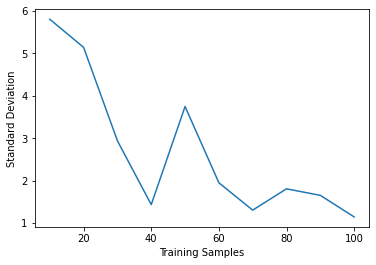

In [ ]:
plt.plot(percent_train,std_list)
plt.xlabel("Training Samples")
plt.ylabel("Standard Deviation")
plt.show()

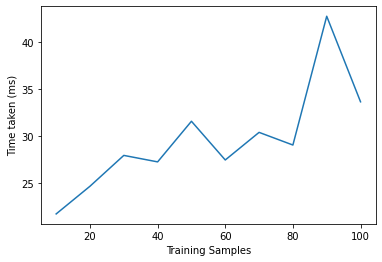

In [ ]:
plt.plot(percent_train,time_list)
plt.xlabel("Training Samples")
plt.ylabel("Time taken (ms)")
plt.show()